Datapoints inicial:  7043 
Datapoints Resampleados:  11164


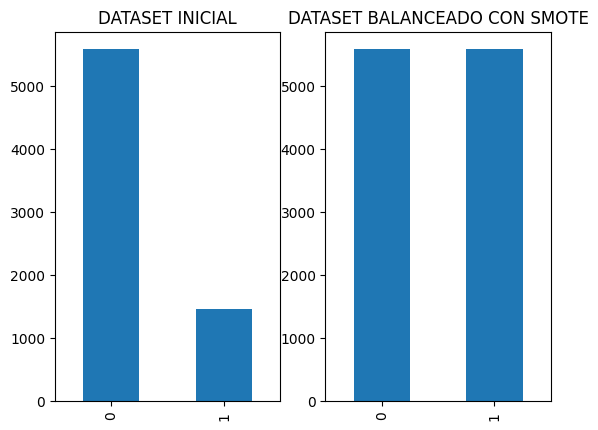

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import time
import sys
import pickle # Pickle serializa los datos como un JSON (pero no legible) para obtener algo como un fichero
from sklearn.metrics import accuracy_score, recall_score

def temp(start_time): #Calcula el tiempo en segundos
    return time.time()-start_time

def fast_stats(y_test, y_prediction, t_mod, t_pred, model, model_name):
    model_stream = pickle.dumps(model)
    model_size = sys.getsizeof(model_stream)
    acc = accuracy_score(y_test, y_prediction)
    spec = recall_score(y_test, y_prediction, pos_label=0)
    df = pd.DataFrame(columns = ["Model Name", "Size Bytes", "Time Model", "Time Prediction", "Accuracy", "Specificity"])
    df.loc[len(df.index)] = [model_name, model_size, t_mod, t_pred, acc, spec]
    return df


#Balanceamos los datos con SMOTE después de ver que hay un claro bias en los datos hacia el 0

df = pd.read_csv("Telco-Customer-Churn.csv")
X = df.iloc[:,0:-1] #Independiente
y = df.Churn_Yes #Dependiente
smote = SMOTE(random_state=100)
x_smote, y_smote =  smote.fit_resample(X = df.iloc[:,0:-1],y = y)
print("Datapoints inicial: ", df.shape[0], "\nDatapoints Resampleados: ",x_smote.shape[0])
plt.subplot(1,2,1)
y.value_counts().plot.bar(title = "DATASET INICIAL") #Claramente desbalanceado 
plt.subplot(1,2,2)
y_smote.value_counts().plot.bar(title = "DATASET BALANCEADO CON SMOTE")
plt.show()


In [3]:
X.describe() #Vemos que los datos están en dimensiones diferentes -> Estandarizamos los datos

,AgeInMonths,TotalComplaintsRegistered,ComplaintsToSupportLastMonth,MonthlyCharges,gender_Male,Corporate Plan_Yes,TelephoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,Streaming-Service_No internet service,Streaming-Service_Yes,Plan_Monthly,Plan_yearly,E-Billing_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,180.019026,5.479057,64.295897,0.504756,0.162147,0.903166,0.096834,0.421837,0.216669,...,0.216669,0.290217,0.216669,0.384353,0.550192,0.240664,0.592219,0.216101,0.335794,0.228880
std,24.559481,179.841053,2.920748,30.092727,0.500013,0.368612,0.295752,0.295752,0.493888,0.412004,...,0.412004,0.453895,0.412004,0.486477,0.497510,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,34.000000,3.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,120.000000,6.000000,70.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,55.000000,280.000000,8.000000,89.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72.000000,720.000000,10.000000,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
X_smote = sc.fit_transform(x_smote) #Usamos los datos Balanceados, no los originales
#train test split al 70/30
xs_train, xs_test, ys_train, ys_test = train_test_split(X_smote, y_smote, train_size= 0.7, random_state = 100) 

In [5]:

#Entrenamos 4 modelos para comprobar cual es el correcto para este caso: 

#Logistic Regression
from sklearn.linear_model import LogisticRegression

st = time.time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(xs_train, ys_train) #Modelo Regresión Logarítmica 
lrt_mod = temp(st)
logreg_stream = pickle.dumps(logreg) #dumps serializa y lo manda a una variable, dump(s) lo manda a un fichero
logreg_size = sys.getsizeof(logreg_stream) #coge el tamaño de la serialización anterior
st = time.time()
ys_pred_logreg = logreg.predict(xs_test) #Crear predicciones en base del modelo
lrt_pred = temp(st)
acc_logreg = accuracy_score(ys_test, ys_pred_logreg, normalize=True) #Ratio de Aciertos Totales (TN+TP). Normalize-> if True da fracción de acierto(0-1), False valor absoluto de aciertos
spec_logreg = recall_score(ys_test, ys_pred_logreg, pos_label=0) #Ratio de True Negatives
a = fast_stats(ys_test, ys_pred_logreg, lrt_mod, lrt_pred, logreg,"Logistic Regression")

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 50, random_state=100)
st = time.time()
dtree.fit(xs_train, ys_train)
dtt_mod = temp(st)
st = time.time()
ys_dtree_pred = dtree.predict(xs_test)
dtt_pred = temp(st)
b = fast_stats(ys_test, ys_dtree_pred, dtt_mod, dtt_pred, dtree,"Decision Tree")

#SVM
from sklearn.svm import SVC

svm_model = SVC(random_state=100, kernel= "rbf")
st = time.time()
svm_model.fit(xs_train, ys_train)
svct_mod = temp(st)
st = time.time()
ys_pred_svm = svm_model.predict(xs_test)
svct_pred = temp(st)
c = fast_stats(ys_test, ys_pred_svm, svct_mod, svct_pred, svm_model,"SVM")

#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth= 2,
                              random_state = 100)
st = time.time()
xgb_model.fit(xs_train, ys_train)
xgbt_mod = temp(st)
st = time.time()
ys_xgb_pred = xgb_model.predict(xs_test)
xgbt_pred = temp(st)
d = fast_stats(ys_test, ys_xgb_pred, xgbt_mod, xgbt_pred, xgb_model,"XGBoost")

stats = pd.concat([a, b.iloc[[0]], c.iloc[[0]], d.iloc[[0]]], ignore_index = True)
stats = stats.set_index(stats.columns[0], drop=True)
stats

,Size Bytes,Time Model,Time Prediction,Accuracy,Specificity
Model Name,,,,,
Logistic Regression,1001,0.056807,0.000374,0.835821,0.810633
Decision Tree,8225,0.022385,0.000761,0.817313,0.807049
SVM,911798,0.742291,0.695496,0.842388,0.823775
XGBoost,94469,0.116697,0.001503,0.846269,0.819594


In [6]:
#Matrices de Confusión para decidir el más idóneo

from sklearn.metrics import confusion_matrix

cmLR = confusion_matrix(ys_test, ys_pred_logreg, normalize= "true")
cmDT = confusion_matrix(ys_test, ys_dtree_pred, normalize= "true")
cmSVM = confusion_matrix(ys_test, ys_pred_svm, normalize= "true")
cmXGB = confusion_matrix(ys_test, ys_xgb_pred, normalize= "true")

cmLR, cmDT, cmSVM, cmXGB

(array([[0.81063321, 0.18936679],
        [0.13902148, 0.86097852]]),
 array([[0.80704898, 0.19295102],
        [0.17243437, 0.82756563]]),
 array([[0.82377539, 0.17622461],
        [0.13902148, 0.86097852]]),
 array([[0.81959379, 0.18040621],
        [0.12708831, 0.87291169]]))

In [7]:
#XGBoost Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

st = time.time()
model = xgb.XGBClassifier()
param_grid = {'learning_rate': [0.1, 0.01],
                'max_depth': [5, 7],
                'n_estimators': [200, 300,],
                'subsample': [0.8, 0.9]
            }
grid_search = GridSearchCV(model, param_grid, cv = 5) #Busca los mejores parámetros para el modelo
grid_search.fit(xs_train, ys_train) #usamos .fit para saber a que aplicar estos parámetros
print("Parámetros óptimos: ",grid_search.best_params_) #parámetros óptimos para el modelo 
print(f"Tiempo XGBoost Búsqueda: {temp(st):.4f}s")

Parámetros óptimos:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Tiempo XGBoost Búsqueda: 61.8720s


0.8701386928540674


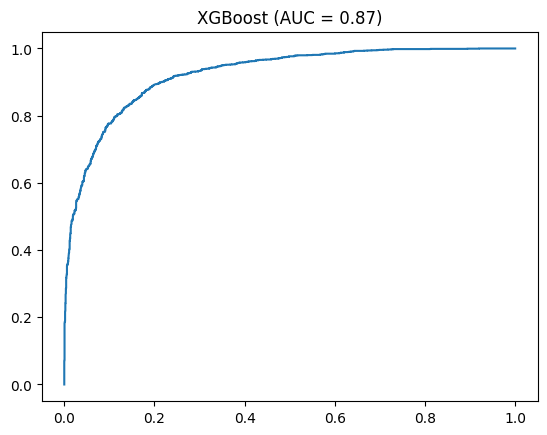

In [8]:
#Nuevo Modelo con los parámetros óptimos

xgb_opt_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 300, subsample = 0.9)
xgb_opt_model.fit(xs_train, ys_train)
yopt_xgb_pred = xgb_opt_model.predict(xs_test)
prob_yopt_pred = xgb_model.predict_proba(xs_test)[:,1]

# Fitness del Modelo

from sklearn.metrics import roc_curve, roc_auc_score

cm_xgb_opt = confusion_matrix(ys_test, yopt_xgb_pred) # Matrix de confusion 
xgb_auc = roc_auc_score(ys_test, yopt_xgb_pred) # Area debajo de la curva ROC (valor a maximizar)
xgb_fpr, xgb_tpr, _ = roc_curve(ys_test, prob_yopt_pred) #False Positive Rate & True Positive Rate con ROC
plt.plot(xgb_fpr, xgb_tpr)
plt.title("XGBoost (AUC = %.2f)" % xgb_auc)
print(xgb_auc)

Text(0.5, 1.0, 'Feature Importance')

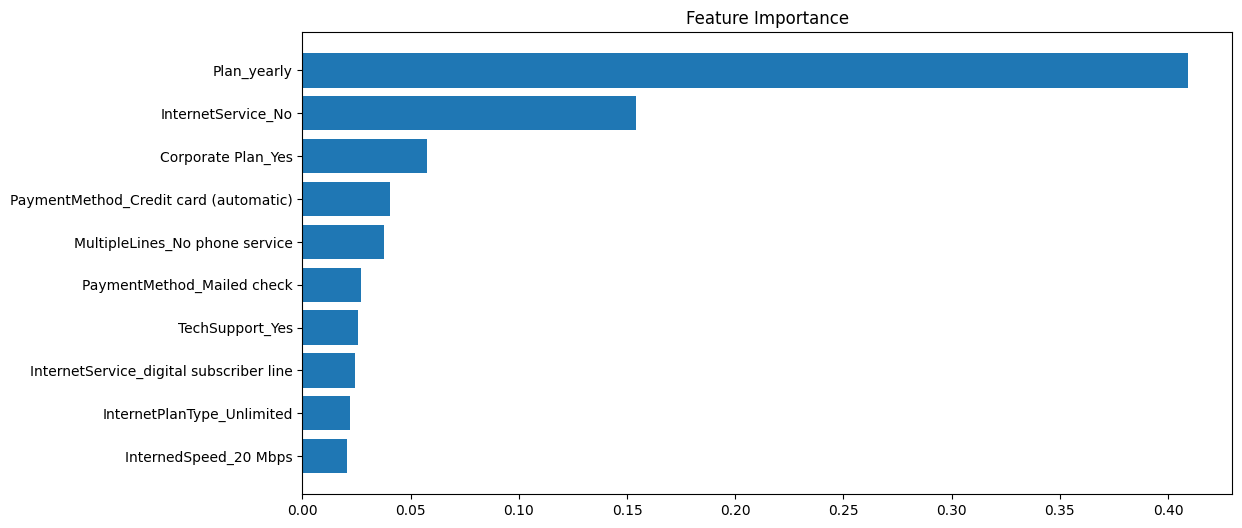

In [9]:
from xgboost import plot_importance

model_importance = xgb_opt_model.feature_importances_
mod_sort = np.argsort(model_importance)[-10:]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(mod_sort)), model_importance[mod_sort], align='center')
plt.yticks(range(len(mod_sort)), np.array(X.columns[mod_sort]))
plt.title('Feature Importance')


In [29]:
#Análisis preeliminar de los cuatro elementos más importantes con Feature importance integrado (Gain)

model_importance = df[X.columns[mod_sort][::-1]]
model_importance.insert(10, "Churn_Yes", df.Churn_Yes, True)

model_importance[model_importance.Churn_Yes == 1].mean()[:4], model_importance[model_importance.Churn_Yes== 0].mean()[:4]

#Para los cuatro elementos más importantes vemos que de media, todos los elementos en los clientes que abandonan son generalmente menos 
#usados por estos clientes que en el caso de los que se mantienen. LLaman la atencion especialmente los casos del plan anual y el servicio de internet
#donde la diferencia de uso entre ambos grupos de clientes es significativamente diferente. 

(Plan_yearly                              0.026694
 InternetService_No                       0.078029
 Corporate Plan_Yes                       0.106092
 PaymentMethod_Credit card (automatic)    0.119097
 dtype: float64,
 Plan_yearly                              0.296668
 InternetService_No                       0.252956
 Corporate Plan_Yes                       0.176818
 PaymentMethod_Credit card (automatic)    0.241491
 dtype: float64)

Text(0.5, 0, 'Permutation Importance')

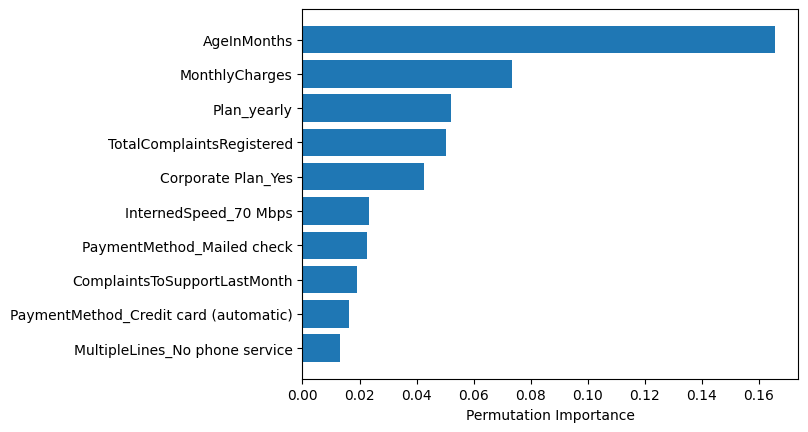

In [10]:
from sklearn.inspection import permutation_importance 

perm_importance = permutation_importance(xgb_opt_model, xs_test, ys_test)
sorted_idx = perm_importance.importances_mean.argsort()[-10:]
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

#La importancia por permutación revisa cada elemento del modelo cambiandolo aleatoriamente y viendo como se desarrolla el modelo y asigna 
#importancia en relación a esa caída. Los elementos más importantes encontrados mediante este algoritmo son la edad en meses, 
#la cantidad de cargo en meses y a la misma altura encontramos el total de quejas registradas y si tienen un plan anual. 

In [32]:
#Análisis preeliminar de los cuatro elementos más importantes con Permutación

feature_importance = df[X.columns[sorted_idx][::-1]]
feature_importance.insert(10, "Churn_Yes", df.Churn_Yes, True)

c_m1 = feature_importance[feature_importance.Churn_Yes == 1].mean()[3]/feature_importance[feature_importance.Churn_Yes == 1].mean()[0]
c_m0 = feature_importance[feature_importance.Churn_Yes == 0].mean()[3]/feature_importance[feature_importance.Churn_Yes == 0].mean()[0]

print(f"Quejas Registradas al Mes para clientes Abandonados vs Mantenidos: {c_m1:.3f} vs {c_m0:.3f}")

feature_importance[feature_importance.Churn_Yes == 1].mean()[:4], feature_importance[feature_importance.Churn_Yes== 0].mean()[:4]

#A priori podemos ver que los clientes que abandonan tienden a tener menos tiempo con la empresa y unos cargos más altos y 
#practicamente no tienen planes anuales. Contrario a una lógica preeliminar, el número total de quejas aún marcándolo como importante 
#no parece ser vital ya que la cantidad en los clientes que abandonan es la mitad de los que se mantienen, que como podemos ver en la tasa
#de quejas mensual media es prácticamente igual en ambos casos, aunque ligeramente superior para el abandono. 

Quejas Registradas al Mes para clientes Abandonados vs Mantenidos: 5.725 vs 5.541


(AgeInMonths                  17.282683
 MonthlyCharges               71.691307
 Plan_yearly                   0.026694
 TotalComplaintsRegistered    98.943874
 dtype: float64,
 AgeInMonths                   36.320315
 MonthlyCharges                62.360265
 Plan_yearly                    0.296668
 TotalComplaintsRegistered    201.239162
 dtype: float64)